## Principal Component Analysis (PCA)

The Principal Component Analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the Machine Learning field. Basically, it's a linear dimensionality reduction technique (algorithm) that transforms a set of correlated variables into a smaller number of uncorrelated variables called principal components, while maintaining as much variability as possible.
By evaluating the cumulative explained variance ratio, you can determine the number of components for PCA that minimizes dimensionality while maximizing variance between original data and projected data.


### Loading the required libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import imageio
import numpy as np
from skimage import color

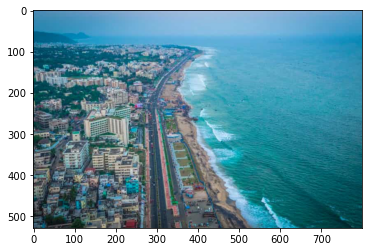

In [3]:
# dimensionality used 
numberComponents = 40

# read in and display the image
img = plt.imread('beach.jpg')
plt.imshow(img)
plt.show()

### Getting the shape of the image

(529, 800, 3)


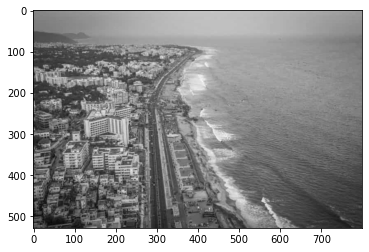

In [4]:
print(img.shape)

# convert the image to greyscale
img=color.rgb2gray(img)
plt.imshow(img, cmap='gray')
plt.show()

### Plot principal components

In [9]:
comps=np.round(pca.explained_variance_ratio_*100, decimals = 2)
print(comps)

[44.85  7.65  4.36  3.78  3.23  2.52  2.27  2.06  1.84  1.66  1.32  1.24
  1.15  1.11  0.95  0.9   0.79  0.75  0.71  0.66  0.63  0.6   0.56  0.53
  0.5   0.45  0.41  0.39  0.37  0.36  0.34  0.33  0.32  0.31  0.29  0.29
  0.27  0.26  0.25  0.23]


### Scree plot

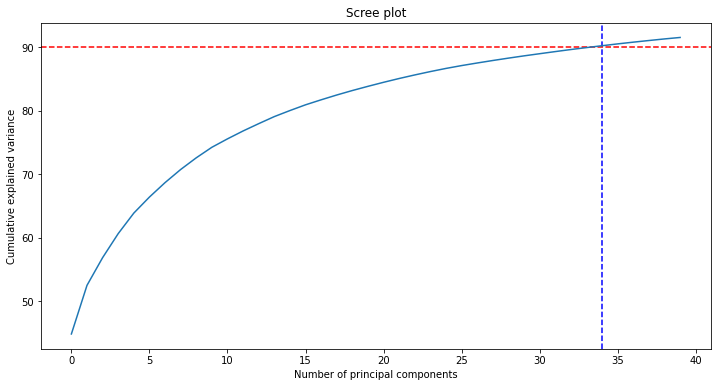

In [10]:
plt.figure(figsize=[12,6])
plt.title('Scree plot')
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of principal components')
plt.axvline(x=k, color="b", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(cum_var)
plt.show()


In the Scree plot, the cumulative explained variance is plotted on the Y-axis, while the number of principal components is plotted on the X-axis. As indicated by the red axis line, the best number of possible principle components can be gathered while maintaining a cumulative variance of up to 90%.
 
Approximately 44% of the variance is explained by the first principal component, 7% by the second principal component, etc.
As a result, we only need 34 of the total principal components to explain over 90% of the variance in the original data. The scree plots can be used in this way to visualise and select how many principal components should be retained.


### Getting the best number of principal components maintaining the cumulative variance

In [14]:
cum_var = np.cumsum(pca.explained_variance_ratio_*100)
k = np.argmax(cum_var>90)
print("Number of components explaining upto 90% variance: "+ str(k))

Number of components explaining upto 90% variance: 34


## Apply PCA

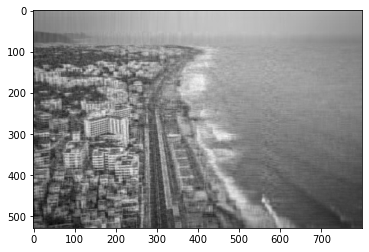

In [16]:
pca = PCA(numberComponents)
img_transformed = pca.fit_transform(img)
img_inverted = pca.inverse_transform(img_transformed)

# display the result
plt.imshow(img_inverted,cmap='gray' )
plt.show()

This is extremely useful since it means that we can keep around 90% of the variance of the data by only relying on 34 components. As a result, we have reduced the dimensions of each channel individually to only 34 from 529, thereby achieving our goal of reducing dimensionality.